In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

path = "/home/pzhurb/bioinf/learn/python/pandas/titanic.csv"
df = pd.read_csv(path)

In [2]:
# how many columns / rows
print(df.shape)

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# какие колонки
print(df.dtypes)

In [ ]:
# сколько NA
print(df.isnull().sum())

In [ ]:
# распределение по классам
pclass_count = df.groupby('Pclass')['Pclass'].count()
print(pclass_count)
left = [1, 2, 3]
hight = pclass_count.tolist()
tick_label = ['1', '2', '3']
plt.bar(left, hight, tick_label = tick_label, width = 0.8, color = ['red', 'green', 'blue'])
plt.title('Распределение по классам')
plt.show()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64



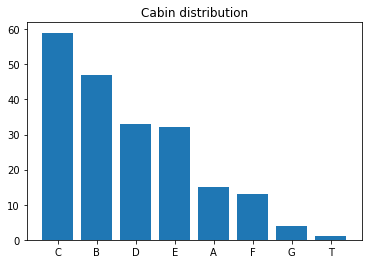

In [3]:
# распределение по каютам
def take_initial(x):
    return x[0]
# убираем NA
cabins = df['Cabin'].dropna()
# берем только первые буквы
cabins = cabins.apply(take_initial)
# подсчитываем количество типов кают
cabins_count = cabins.value_counts()
print(cabins_count, end='\n\n')
# график
plt.title('Cabin distribution')
plt.bar(cabins_count.index, cabins_count.values)
plt.show()

In [ ]:
# распределение по возрасту, построение гистограммы
ages = df[df['Age'].notnull()]['Age'].values
# создание аррея
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']
plt.figure(figsize=(7,7))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0])
plt.xlabel('Age')
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+3, str(int(i)), fontsize=12,
    horizontalalignment='center', verticalalignment='center')
plt.show()

In [ ]:
# узнаем сколько выжило
survived_count = df.groupby('Survived')['Survived'].count()
print(survived_count)
left = [1, 2]
hight = survived_count.tolist()
tick_label = ['not survived', 'survived']
plt.bar(left, hight, tick_label = tick_label, width = 0.8, color = ['red', 'green'])
plt.title('Общая статистика выживших')
plt.show()

In [ ]:
# сколько выжило в зависимости от гендера
survived_sex = df.groupby('Sex')['Survived'].sum()
print(survived_sex)
left = [1, 2]
hight = survived_sex.tolist()
tick_label = ['female', 'male']
plt.bar(left, hight, tick_label = tick_label, width = 0.8, color = ['red', 'green'])
plt.title('Выжившие в зависимости от гендера')
plt.show()

In [ ]:
# сколько выжило в зависимости от возраста
age_survived = df.loc[df['Survived'] == 1, "Age"]
age_survived.plot.hist(fc = (0, 0, 1, 0.5), label = "Выжили")
age_did_not_survive = df.loc[df['Survived'] == 0, "Age"]
age_did_not_survive.plot.hist(fc=(1, 0, 0, 0.5), label = "Не выжили")
plt.xlabel("Возраст")
plt.ylabel("Процент пассажиров")
plt.legend(loc = 'upper right')
plt.title("Выжившие в зависимости от возраста")
plt.show()

In [ ]:
# Изначальная матрица корреляций
train_corr = df.corr(method='pearson')
plt.figure(figsize=(18, 12))
sns.set(font_scale=1.4)
sns.heatmap(train_corr,
            annot=True,
            linecolor='white',
            linewidth=0.5,
            cmap='magma')
plt.title("Изначальная матрица корреляций")
plt.show()

In [ ]:
# Матрица корреляций для женщин
dataFemale = df[(df['Sex'] == 'female')]
dataFemaleCorr = dataFemale.drop(["Sex"], axis = 1).corr()
corrF = dataFemaleCorr['Survived'].sort_values(ascending=False)
corrF = corrF.drop(['Survived'])

In [ ]:
# heatmap and barplot
fig = plt.figure(figsize=(18, 22))
sns.set(font_scale=1.4)
plt.title('Матрица корреляций для женщин', fontsize=10)
sns.heatmap(dataFemaleCorr,
            annot=True,
            linecolor='white',
            linewidth=0.5,
            cmap='magma')
plt.title("Матрица корреляций для женщин")
plt.show()
